In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data
created a function to look at data on your desktop in a folder labeled **data**

In [3]:

def import_raw_data(operating_system ='mac'):
    '''generate a dictionary of raw dataframes
    
    parameters
    -----------
    type of operating system used windows or mac
    default mac
    
    '''
    if operating_system == 'mac':
        base_file_path = r"/Users/{}/Desktop/data".format(os.getlogin())
    if operating_system == 'windows':
        base_file_path = r"C:\Users\{}\Desktop\data".format(os.getlogin())
    df_dict = dict()
    for file in os.listdir(base_file_path):
        if file.endswith('.csv'):
            df_dict[file.split('.')[0]] = pd.read_csv(os.path.join(base_file_path,file))
    return df_dict

In [4]:
df_dict = import_raw_data()
filenames = list(df_dict.keys())

In [5]:
df_dict.keys()

dict_keys(['winemag-data-130k-v2', 'winemag-data_first150k'])

**check out the differences between the two files**

combine together if not hugely different

1.first version wine

In [6]:
wine_version_one = df_dict.get(filenames[1])
wine_version_one.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
wine_version_one.info()
print("df shape", wine_version_one.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
df shape (150930, 11)


In [8]:
wine_version_two = df_dict.get(filenames[0])
wine_version_two.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
wine_version_two.info()
print("df shape", wine_version_two.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB
df shape (129971, 14)


**difference in columns**

In [29]:
print(f"version 1 has {len(wine_version_one.columns)} and version 2 has {len(wine_version_two.columns)}")
column1 = set(list(wine_version_two.columns))
column2 = set(list(wine_version_one.columns))
print(f"{column2-column1} columns missing from version from version 1 data")

version 1 has 11 and version 2 has 14
set() columns missing from version from version 1 data


# General Cleaning

In [10]:
wine_version_two.drop(inplace=True,columns=['Unnamed: 0'])
wine_version_two = wine_version_two.reset_index(drop=True)
print(wine_version_two.shape)

(129971, 13)


general stastic for the data

In [11]:
wine_version_two.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [12]:
print(f"number of duplicates: {wine_version_two[wine_version_two.duplicated(['points','title','description'])].shape[0]}")

number of duplicates: 9983


In [13]:
data = wine_version_two.drop_duplicates(subset=['points','title','description'])
data = data.reset_index(drop=True)

# Missing values

In [14]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()*100) 
missing = pd.concat([total,percent],axis=1,keys=['Total','percent']).sort_values(ascending=False,by=['Total','percent'])
missing

,Total,percent
region_2,73219,61.021936
designation,34545,28.790379
taster_twitter_handle,29446,24.540787
taster_name,24917,20.766243
region_1,19560,16.301630
price,8395,6.996533
country,59,0.049172
province,59,0.049172
variety,1,0.000833
description,0,0.000000


price missing 8395 from check relevance

# Histogram of points

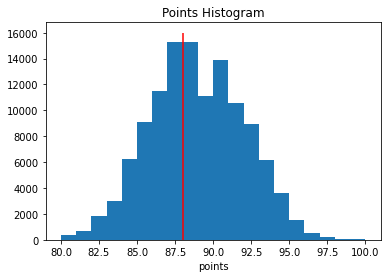

Fisher Pearson coffecient of skewness 0.043617821063350604


In [96]:
fig = plt.Figure(figsize=(5,8))
ax = fig.add_subplot()
plt.title('Points Histogram')
plt.hist(x=data['points'],bins=20)
plt.vlines(x=data['points'].median(),ymin=0,ymax=16000,color='r')
plt.xlabel('points')
plt.show()

from scipy.stats import skew
print(f"Fisher Pearson coffecient of skewness {skew(data['points'])}")

distribution of data is normally distributed so don't need transform the target value for the analysis. Skewness is approximately zero as such is normally distributed.

# countries points by province & country

check relation to points & province & country

In [16]:
PRICE = 'price'
POINTS = 'points'
def generate_groupby_df(df, key,feature):
    return pd.Series(df.groupby([key])[feature].mean().sort_values(ascending=False))

In [75]:
import warnings
warnings.simplefilter("ignore")
# country by mean point 
country_list = []
province_list= []
for i,v in zip([PRICE,POINTS,PRICE,POINTS],['country','country','province','province']):
    if v=='country':
        country_list.append(generate_groupby_df(data,v,feature=i))
    if v=='province':
        province_list.append(generate_groupby_df(data,v,feature=i))

country_count = data['country'].value_counts()
province_count = data['province'].value_counts()
country = pd.concat(country_list +[country_count],axis=1).reset_index().rename(columns={'index':'country','country':'count'})
province = pd.concat(province_list + [province_count],axis=1).reset_index().rename(columns={'index':'province','province':'count'})

In [54]:
country.head()

,country,price,points,count
0,Argentina,24.575264,86.649831,3544
1,Armenia,14.500000,87.500000,2
2,Australia,35.686491,88.561220,2197
3,Austria,31.336751,90.129532,3034
4,Bosnia and Herzegovina,12.500000,86.500000,2


**The top 20 countries with the highest average price relative to the total number of wines produced in the country**

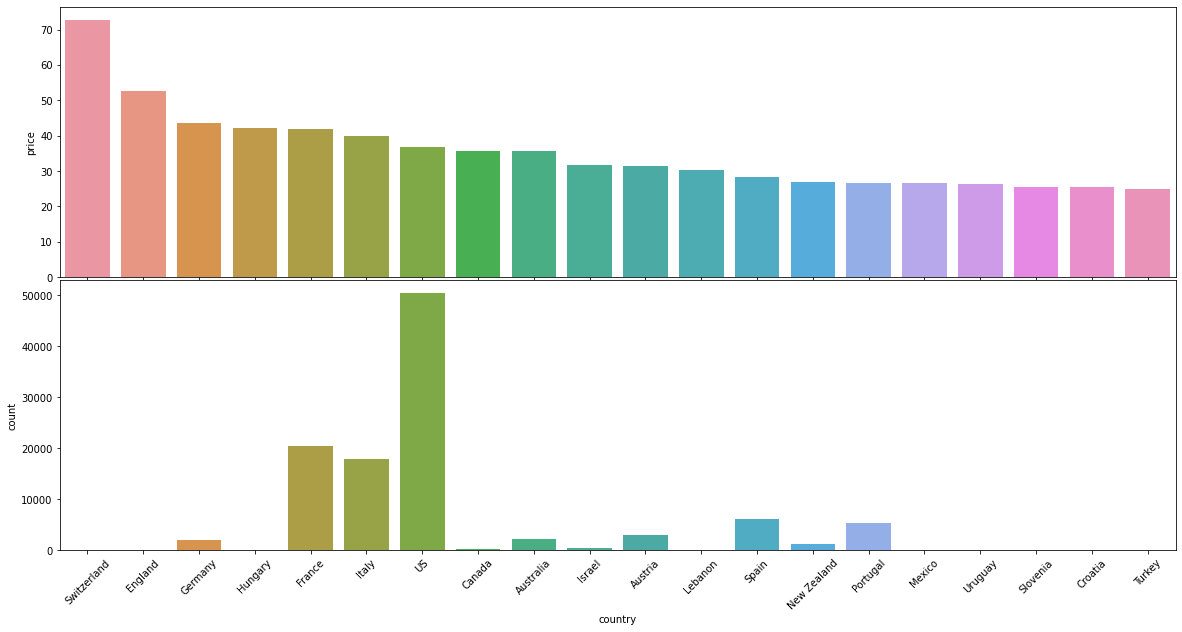

In [70]:
def create_bar_chart(cat,feature,data):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212,sharex=ax1)
    df = data.sort_values(by=feature,ascending=False).head(20)
    sns.barplot(x=cat,y='count',data=df,ax=ax2)
    sns.barplot(x=cat,y=feature,data=df,ax=ax1)
    ax1.tick_params(axis='x', labelrotation=45 )
    ax2.tick_params(axis='x', labelrotation=45)
    plt.subplots_adjust(hspace=0.01)
    plt.show()
plt.close()
create_bar_chart('country','price',country)

**The top 20 countries with the highest average points relative to the total number of wines produced in the country**

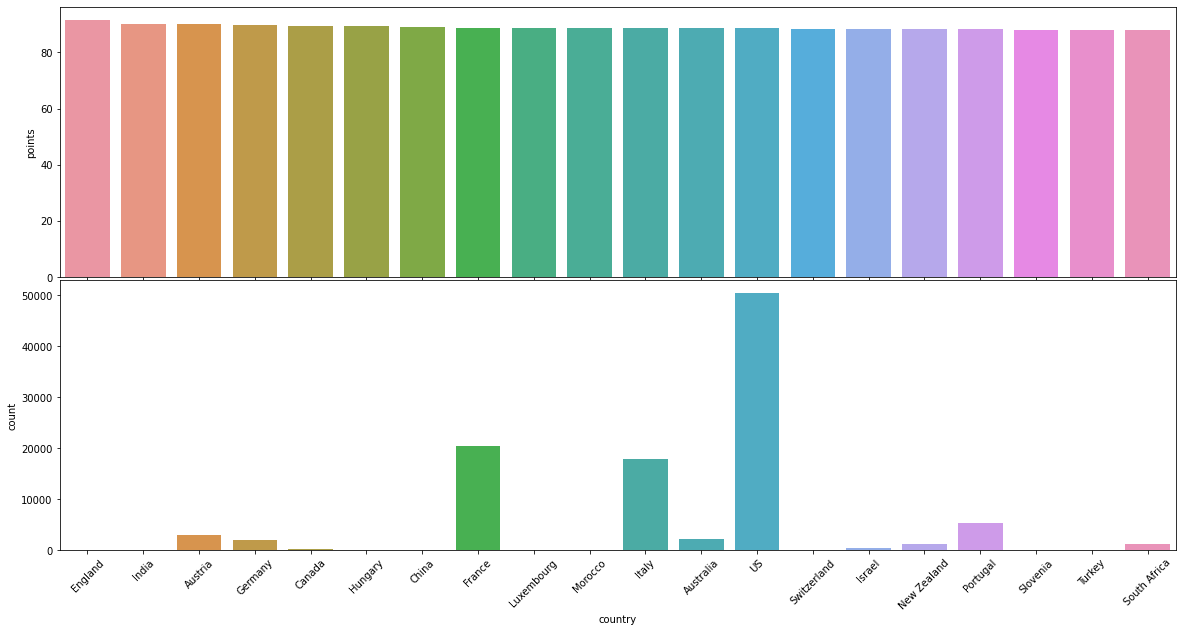

In [72]:
create_bar_chart('country','points',country)

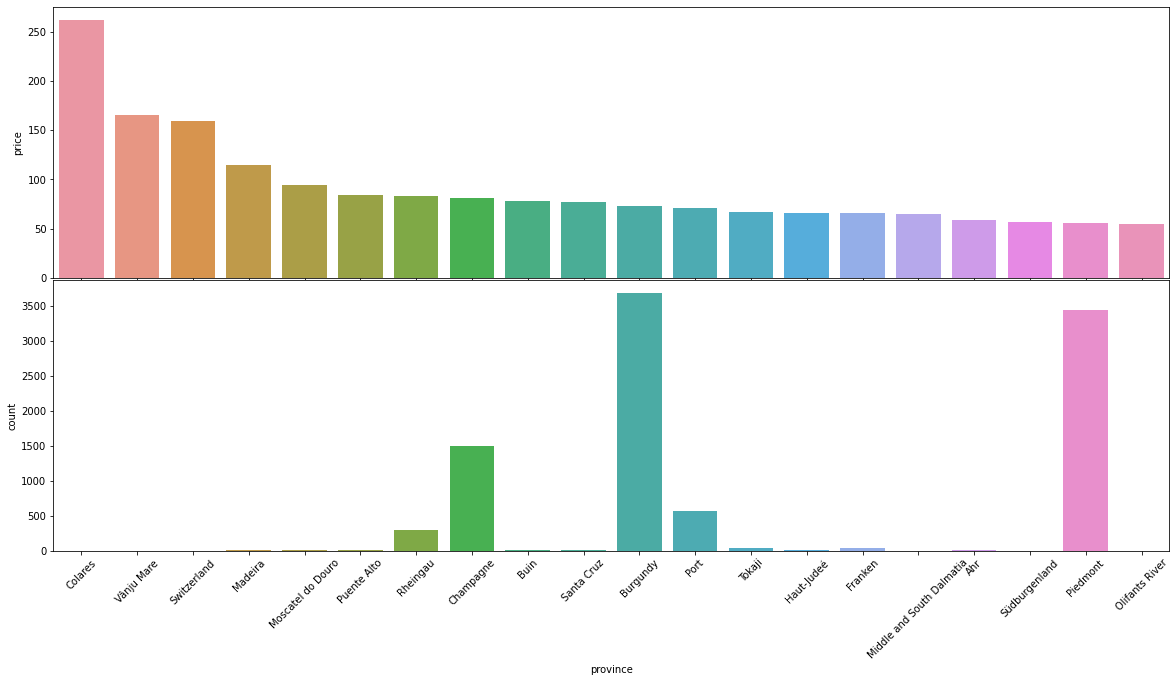

In [76]:
create_bar_chart('province','price',province)

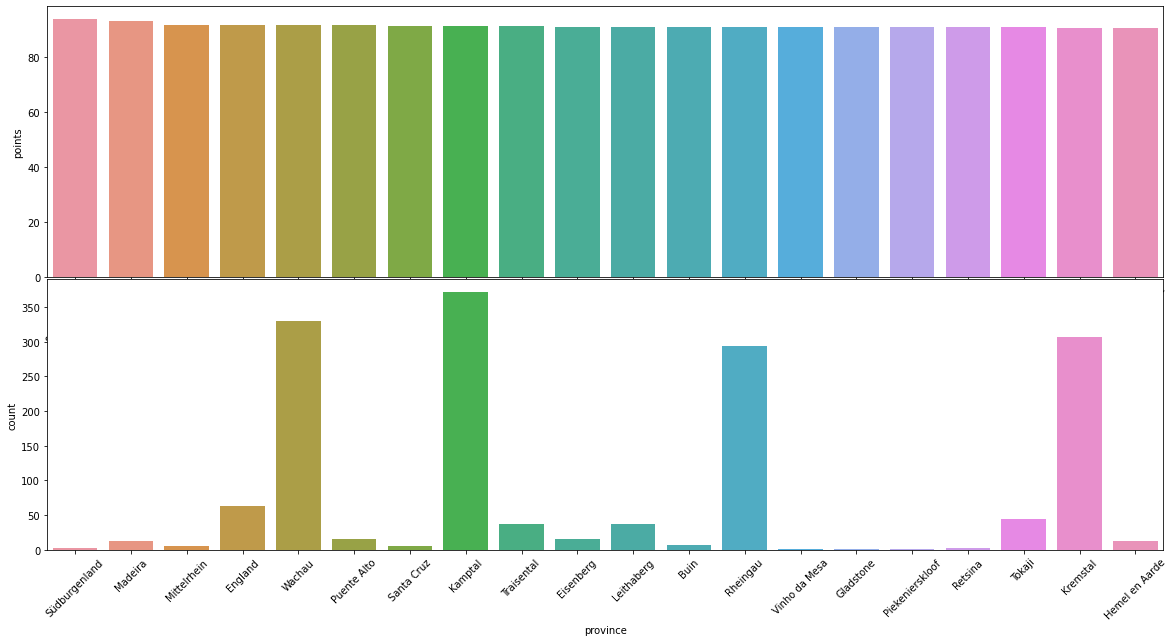

In [77]:
create_bar_chart('province','points',province)

In [90]:
for df in [country,province]:
    df['normalised'] = df['points']/df['count'].sum()
country.sort_values(by='normalised',ascending=False).head(10)
country.loc[]

,country,price,points,count,normalised
14,England,52.677966,91.746032,63,0.000765
20,India,13.750000,90.250000,8,0.000753
3,Austria,31.336751,90.129532,3034,0.000752
17,Germany,43.460789,89.895582,1992,0.000750
7,Canada,35.776786,89.309735,226,0.000745
19,Hungary,42.234375,89.294574,129,0.000745
9,China,18.000000,89.000000,1,0.000742
15,France,41.994105,88.866752,20353,0.000741
24,Luxembourg,23.400000,88.800000,5,0.000740
28,Morocco,18.958333,88.708333,24,0.000740


In [89]:
province.sort_values(by='normalised',ascending=False).head(10)
province.loc[:10,'normalised']

0     0.000715
1     0.000731
2     0.000735
3     0.000740
4     0.000721
5     0.000752
6     0.000724
7     0.000733
8     0.000739
9     0.000734
10    0.000722
Name: normalised, dtype: float64

In [82]:
## uk provide information for their premium wines
## add notes & regions

# Price 

3300.0
0.5542220888755542


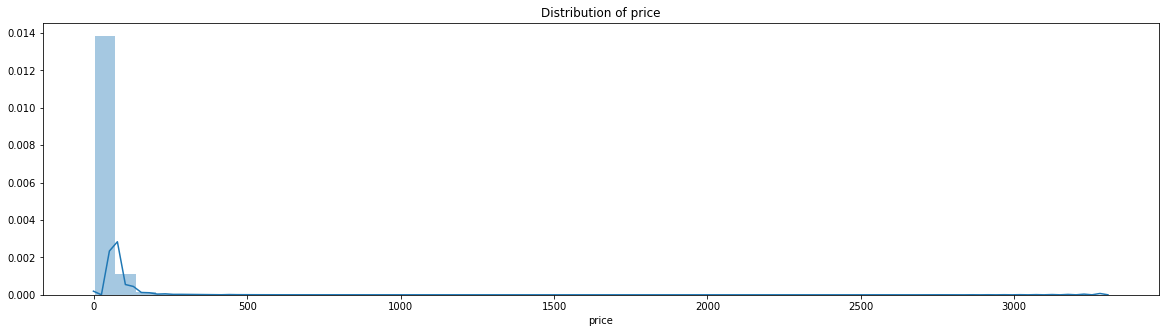

In [91]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(data["price"])
print(data["price"].max())
print(data[data['price']>200].shape[0]/data.shape[0]*100)

There are exceptionally high value wines with maximum value of 3300, however the majority of wines are below 200 dollars, with only 0.55% greater then 200 dollars 99.55% below 200 dolars  

Fisher Pearson coffecient of skewness nan


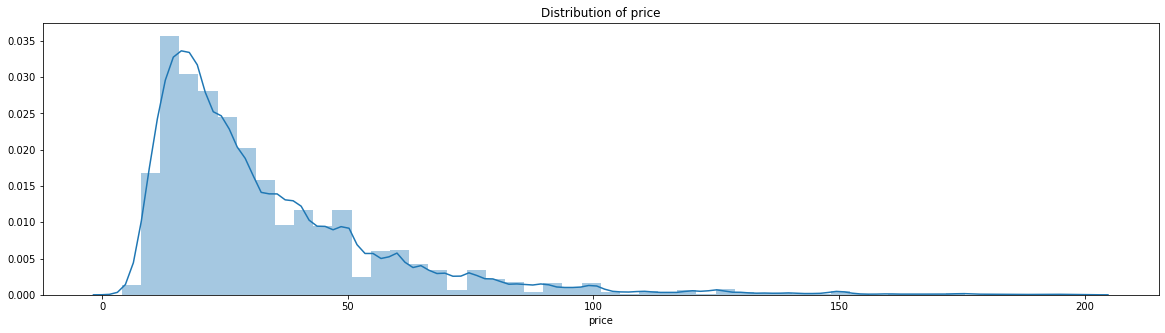

In [97]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(data[data['price']<200]['price'])
print(f"Fisher Pearson coffecient of skewness {skew(data['price'])}")

filtering off the wines greater then 200 dollars it's clear the majority of wines as less then 50 dollars, which makes sense given that the majority of wines are cheap. Let's use a boxplot to define the outliers relative to the interquartile range.

<AxesSubplot:>

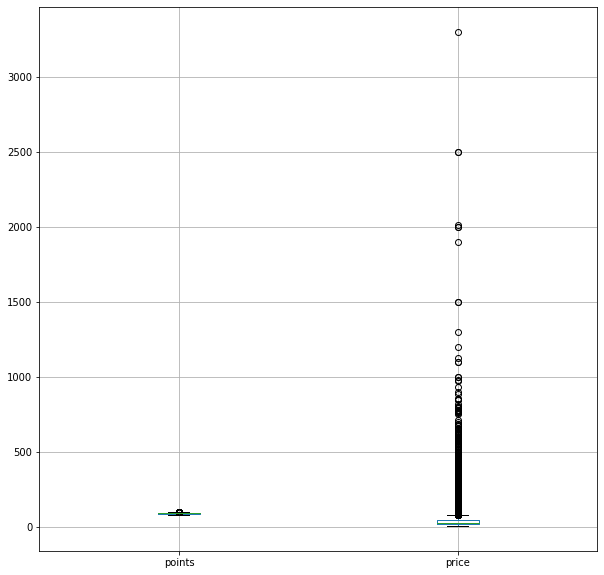

In [103]:
plt.figure(figsize=(10,10))
data.boxplot()

The outliers are valid as they are realistic - skews the data & warp the data processing. multiple methods for transforming the data to deal with the outliers, as the outliers are realistic its not sensible to remove them.Some of the methods are inlcuded below:
1. Quantile based flooring and capping
2. IQR score
3. Log Transformation

Lets measure the transformation using skew

0.7556856655113601


<AxesSubplot:xlabel='price'>

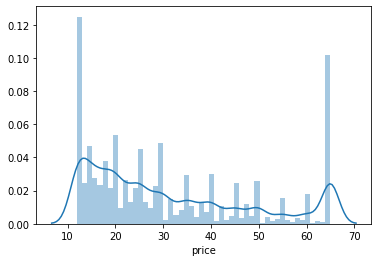

In [120]:
## change a few items i.e. the dataframes 
df1 = data
tenth = df1['price'].quantile(0.10)
nighty = df1['price'].quantile(0.90)
df1['price'] = np.where(df1['price'] <tenth, tenth,df1['price'])
df1['price'] = np.where(df1['price'] >nighty, nighty,df1['price'])
print(df1['price'].skew())
sns.distplot(df1['price'])

0.7556856655113601
-1.8267744537939166


<AxesSubplot:xlabel='price_log'>

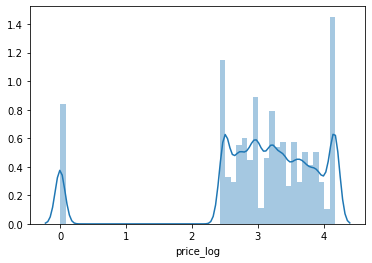

In [119]:
df2 = data
df2["price_log"] = df2["price"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df2['price'].skew())
print(df2['price_log'].skew())
sns.distplot(df2['price_log'])

<AxesSubplot:xlabel='price'>

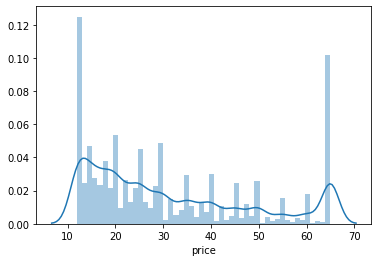

In [118]:
sns.distplot(df2['price'])